In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

In [ ]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

In [ ]:
# импорт нужных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Analysis/lab4/car.csv', sep=',',quotechar='"')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

symboling
Перевод: Страховой рейтинг
Описание: Индикатор риска для страховой компании, где -2 — низкий риск, а 3 — высокий риск.
Единицы: Целое число.

fueltype
Перевод: Тип топлива
Описание: Вид топлива, используемого автомобилем (дизельное или газовое топливо).
Возможные значения: diesel (дизель), gas (газ).

aspiration
Перевод: Тип наддува
Описание: Указывает, используется ли турбонаддув в двигателе.
Возможные значения: std (без турбо), turbo (турбонаддув).

doornumber
Перевод: Количество дверей
Описание: Количество дверей автомобиля.
Возможные значения: four (четыре), two (две).

carbody
Перевод: Тип кузова
Описание: Форма кузова автомобиля.
Возможные значения: convertible (кабриолет), hardtop (жесткая крыша), hatchback (хэтчбек), sedan (седан), wagon (универсал).

drivewheel
Перевод: Привод
Описание: Тип привода автомобиля.
Возможные значения: 4wd (полный привод), fwd (передний привод), rwd (задний привод).

enginelocation
Перевод: Расположение двигателя
Описание: Указывает, где расположен двигатель (спереди или сзади).
Возможные значения: front (спереди), rear (сзади).

wheelbase
Перевод: Колесная база
Описание: Расстояние между передней и задней осями.
Единицы: Дюймы.

carlength
Перевод: Длина автомобиля
Описание: Полная длина автомобиля.
Единицы: Дюймы.

carwidth
Перевод: Ширина автомобиля
Описание: Полная ширина автомобиля.
Единицы: Дюймы.

carheight
Перевод: Высота автомобиля
Описание: Полная высота автомобиля.
Единицы: Дюймы.

curbweight
Перевод: Снаряженная масса
Описание: Масса автомобиля без пассажиров и груза.
Единицы: Фунты.

enginetype
Перевод: Тип двигателя
Описание: Конфигурация двигателя.
Возможные значения: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.

cylindernumber
Перевод: Количество цилиндров
Описание: Число цилиндров в двигателе.
Возможные значения: eight (8), five (5), four (4), six (6), three (3), twelve (12), two (2).

enginesize
Перевод: Объем двигателя
Описание: Рабочий объем двигателя.
Единицы: Кубические сантиметры (cc).

fuelsystem
Перевод: Топливная система
Описание: Тип системы подачи топлива.
Возможные значения: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.

boreratio
Перевод: Диаметр цилиндра
Описание: Отношение диаметра цилиндра к ходу поршня.
Единицы: Относительное значение.

stroke
Перевод: Ход поршня
Описание: Расстояние, на которое движется поршень.
Единицы: Дюймы.

compressionratio
Перевод: Степень сжатия
Описание: Отношение максимального объема цилиндра к минимальному.
Единицы: Относительное значение.

horsepower
Перевод: Мощность двигателя
Описание: Максимальная мощность двигателя.
Единицы: Лошадиные силы (hp).

peakrpm
Перевод: Максимальные обороты
Описание: Максимальное количество оборотов в минуту (RPM).
Единицы: Обороты в минуту.

citympg
Перевод: Расход топлива в городе
Описание: Расход топлива в городских условиях.
Единицы: Миль на галлон (mpg).

highwaympg
Перевод: Расход топлива на шоссе
Описание: Расход топлива на шоссе.
Единицы: Миль на галлон (mpg).

price
Перевод: Цена
Описание: Стоимость автомобиля.
Единицы: Доллары США ($).

In [ ]:
dataset.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
dataset.describe(include=['O'])

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205
unique,2,2,2,5,3,2,7,7,8
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,168,115,96,120,202,148,159,94


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

enc_ = OrdinalEncoder()

dataset[['fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem']] = enc_.fit_transform(dataset[['fueltype',	'aspiration',	'doornumber',	'carbody',	'drivewheel',	'enginelocation',	'enginetype',	'cylindernumber',	'fuelsystem']])

In [ ]:
enc_.categories_

[array(['diesel', 'gas'], dtype=object),
 array(['std', 'turbo'], dtype=object),
 array(['four', 'two'], dtype=object),
 array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object),
 array(['4wd', 'fwd', 'rwd'], dtype=object),
 array(['front', 'rear'], dtype=object),
 array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object),
 array(['eight', 'five', 'four', 'six', 'three', 'twelve', 'two'],
       dtype=object),
 array(['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
       dtype=object)]

In [ ]:
dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1.0,0.0,1.0,0.0,2.0,0.0,88.6,168.8,64.1,...,130,5.0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1.0,0.0,1.0,2.0,2.0,0.0,94.5,171.2,65.5,...,152,5.0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1.0,0.0,0.0,3.0,1.0,0.0,99.8,176.6,66.2,...,109,5.0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1.0,0.0,0.0,3.0,0.0,0.0,99.4,176.6,66.4,...,136,5.0,3.19,3.40,8.0,115,5500,18,22,17450.0


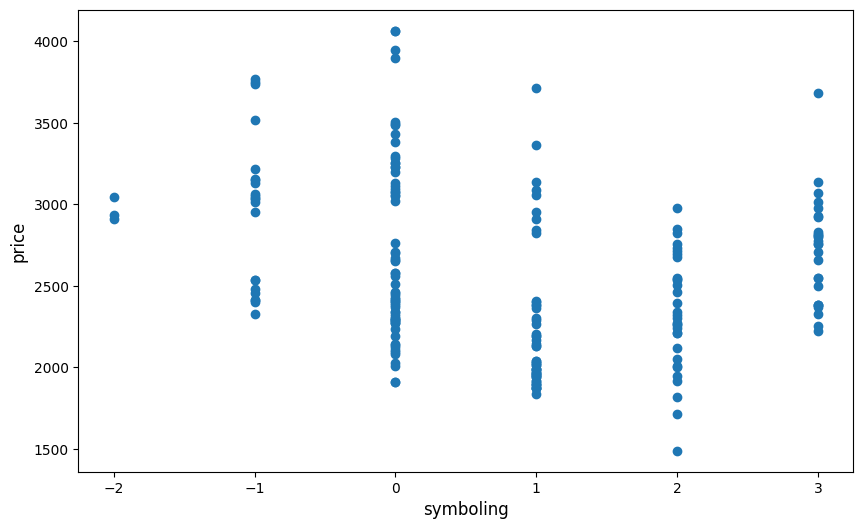

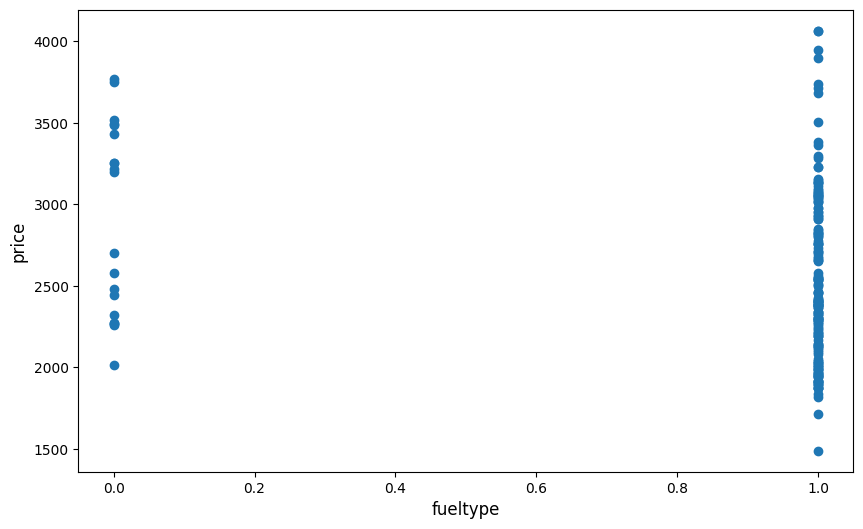

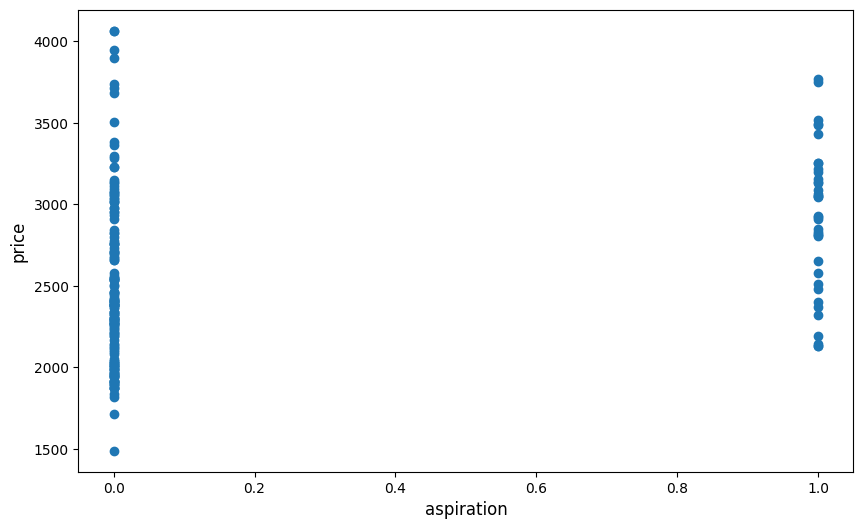

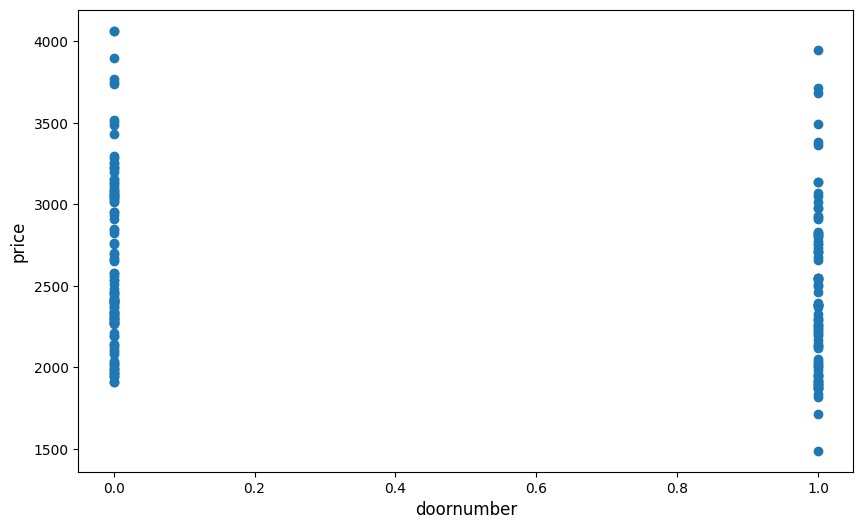

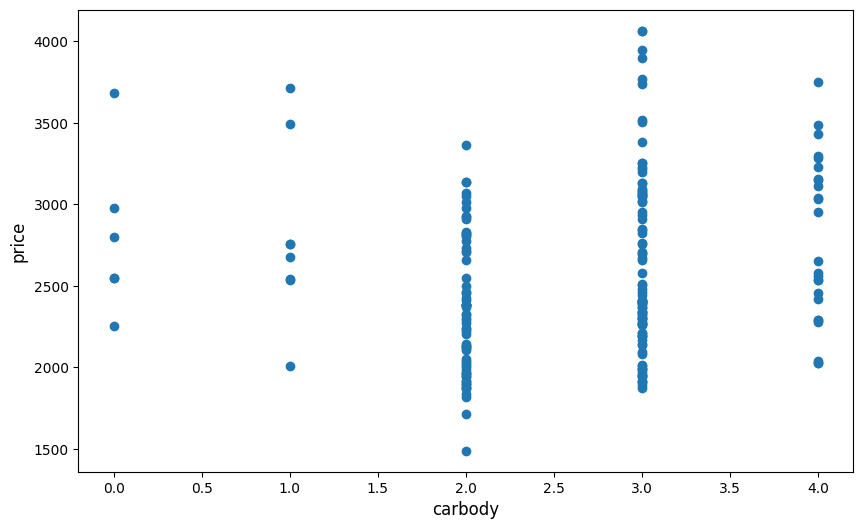

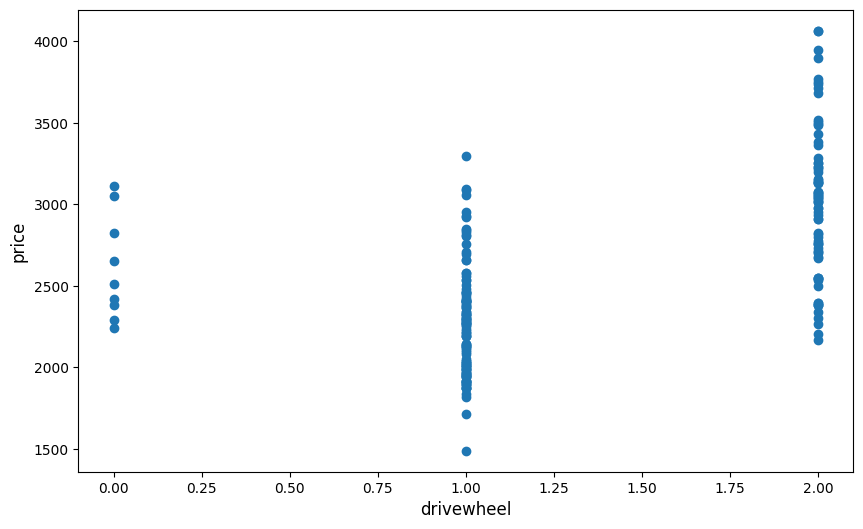

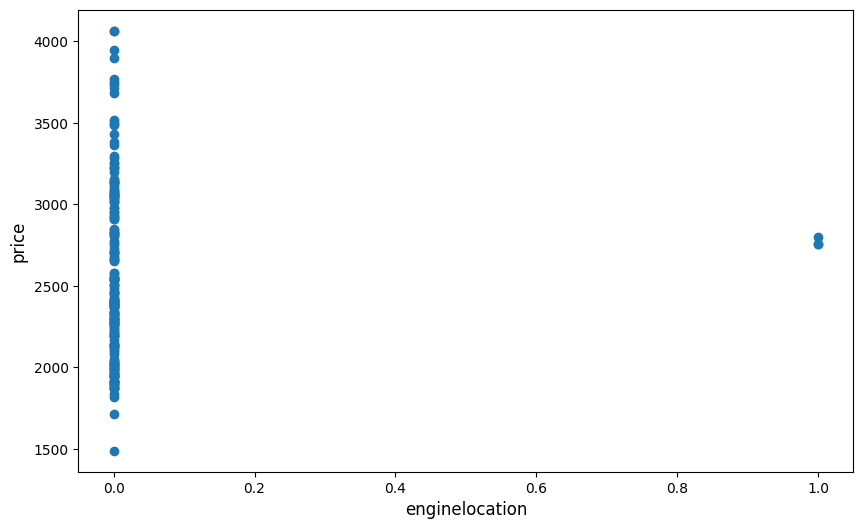

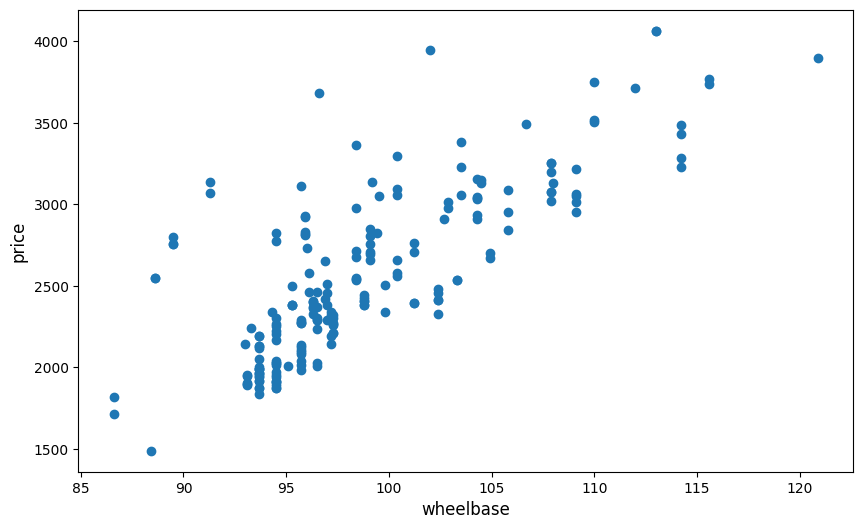

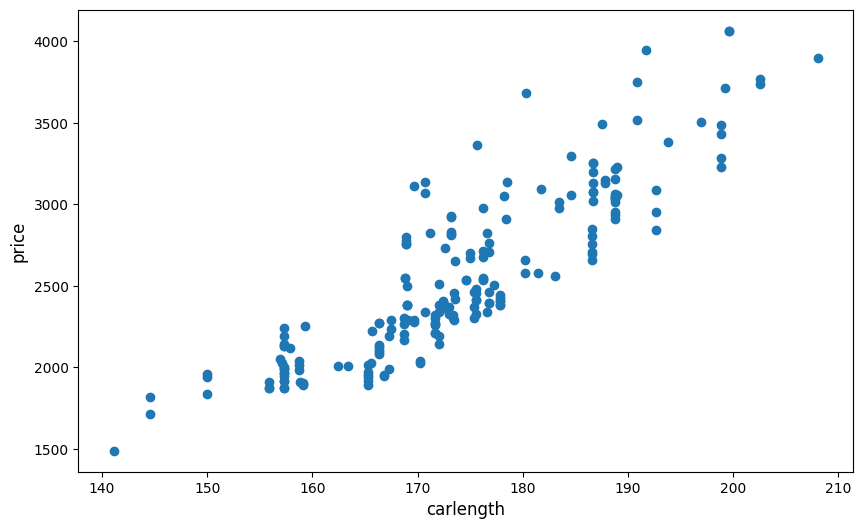

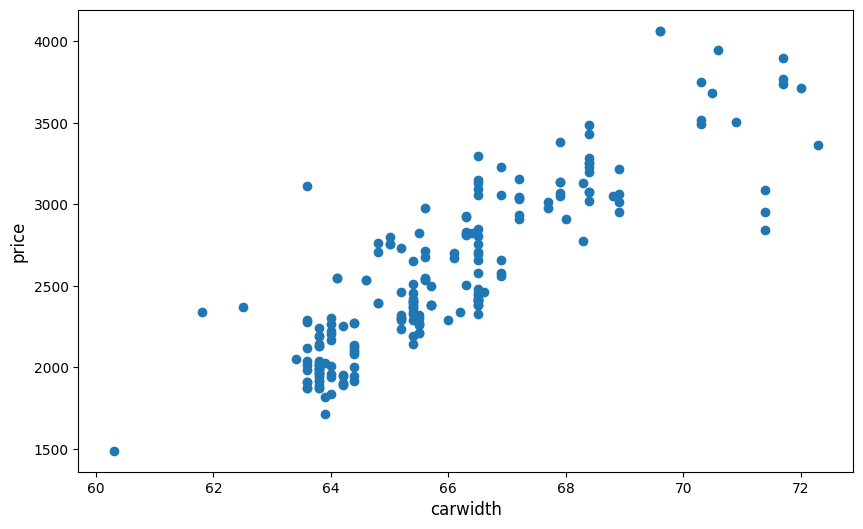

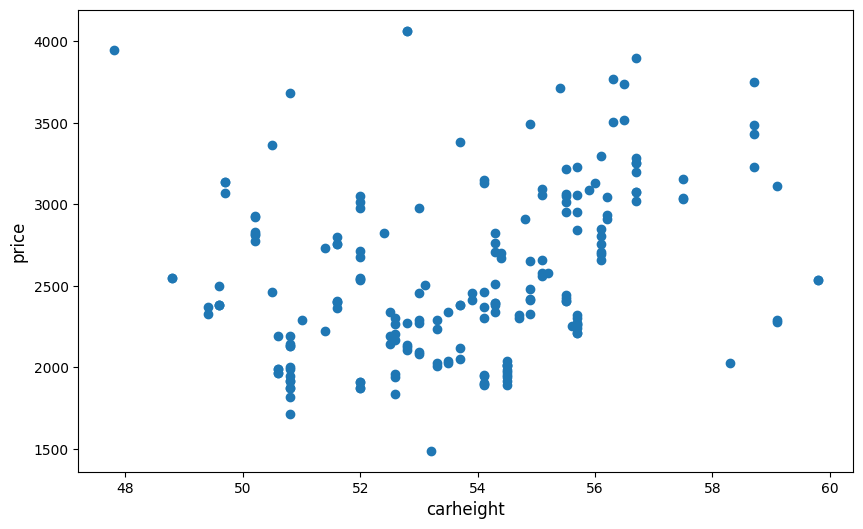

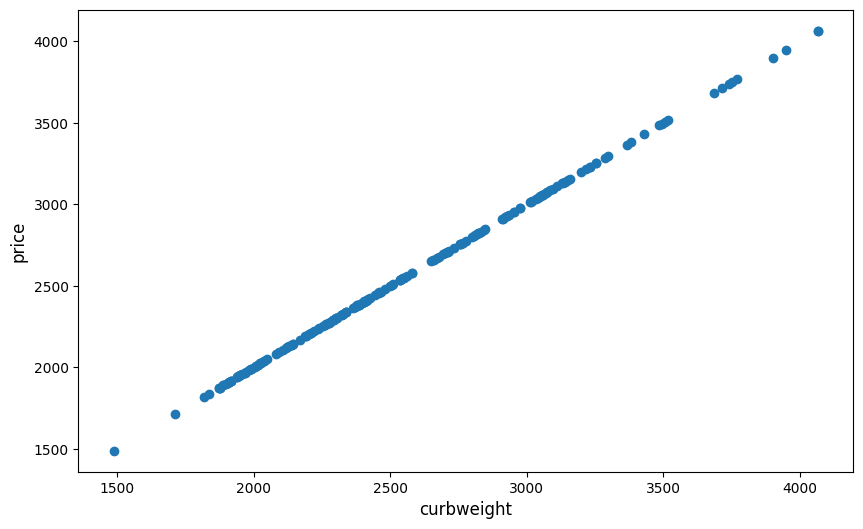

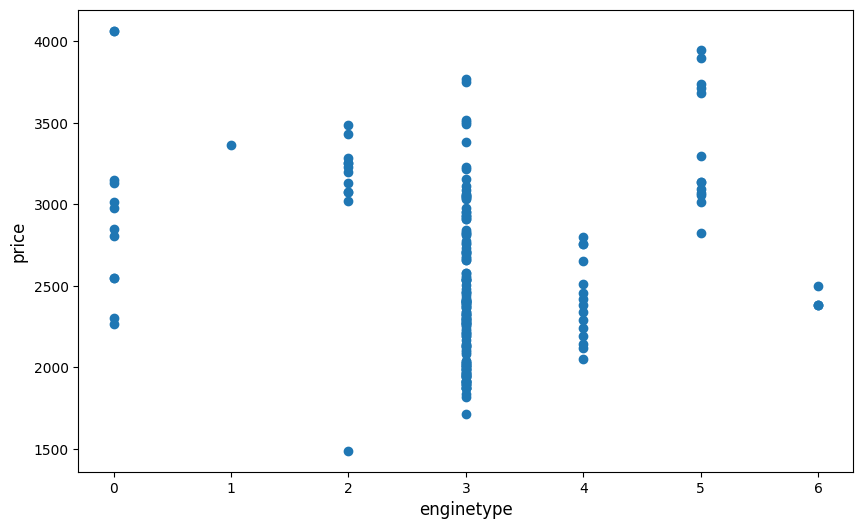

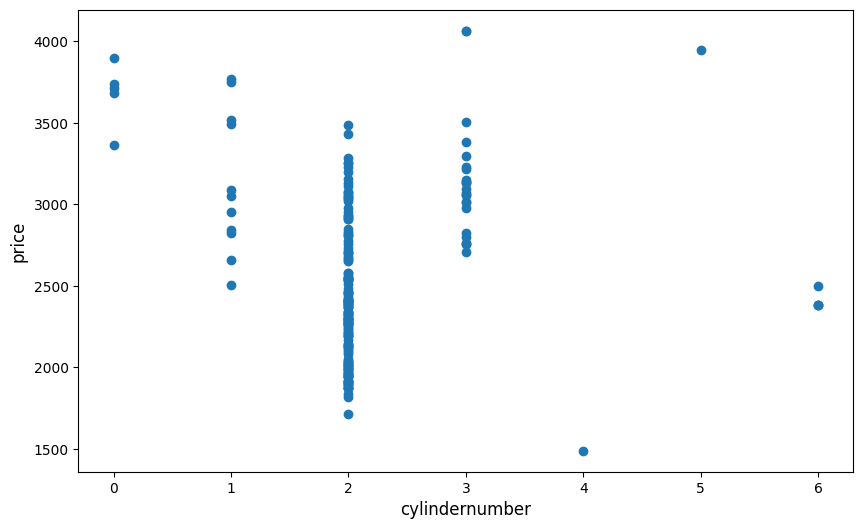

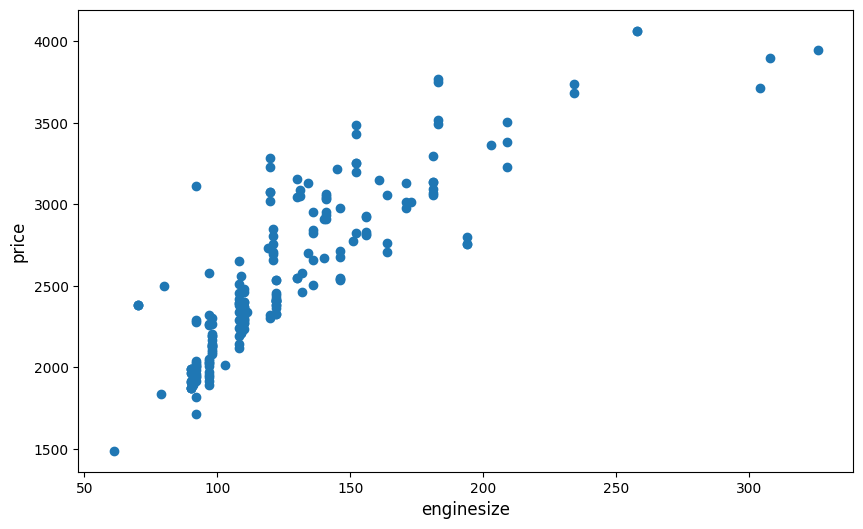

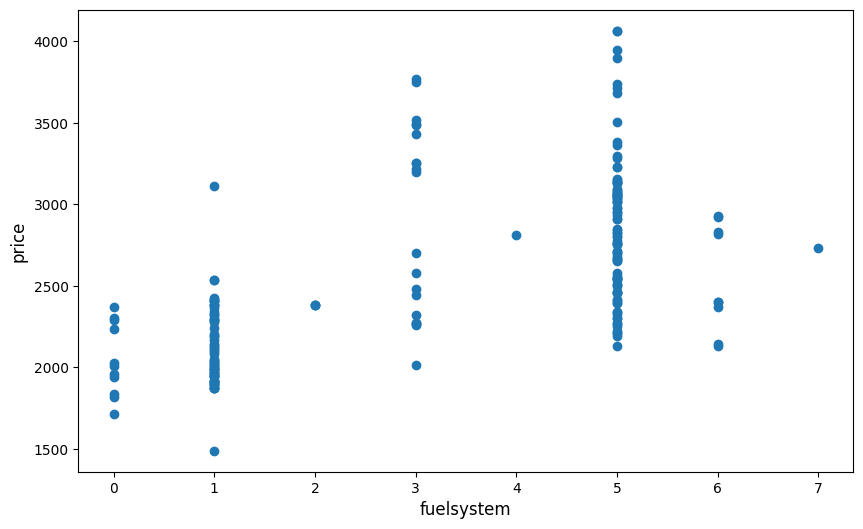

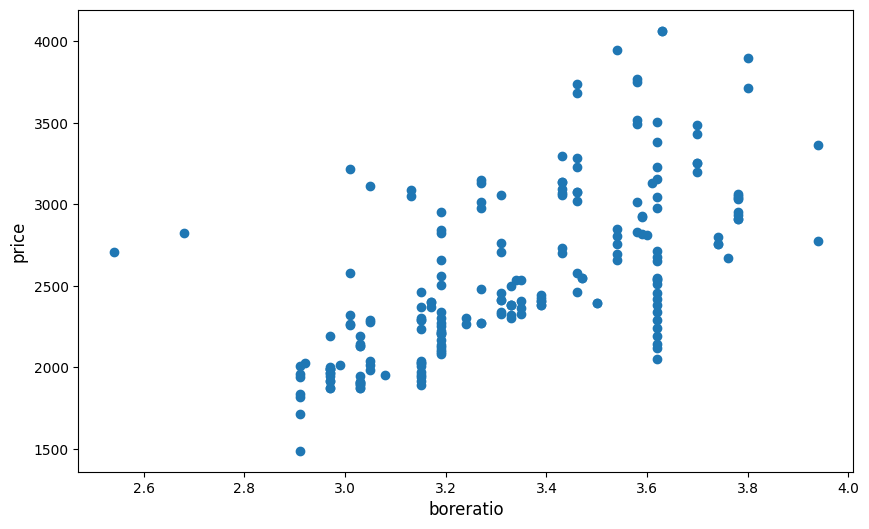

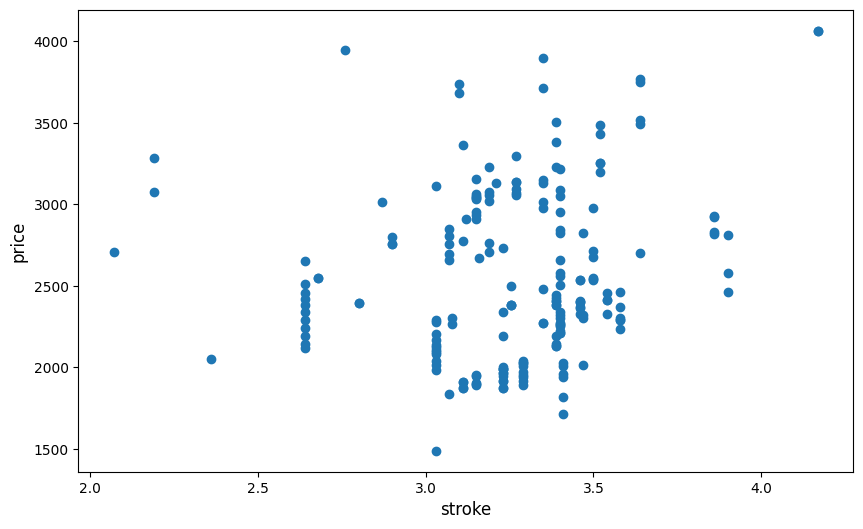

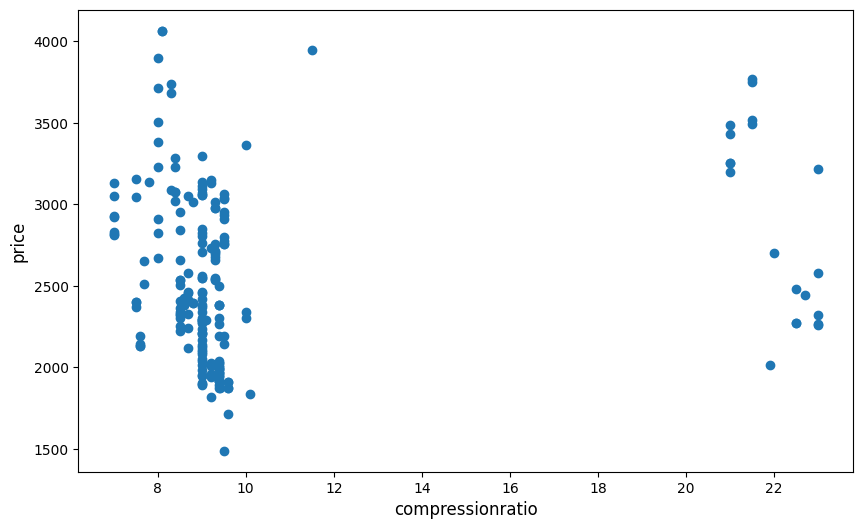

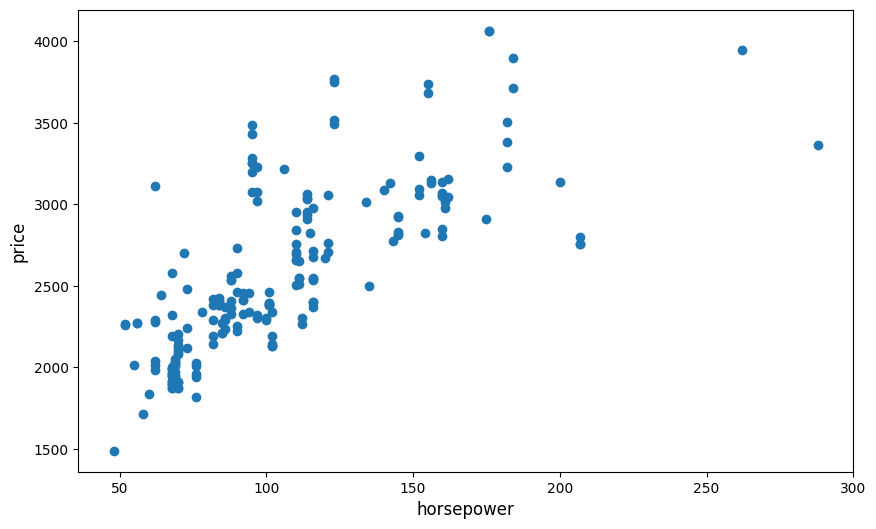

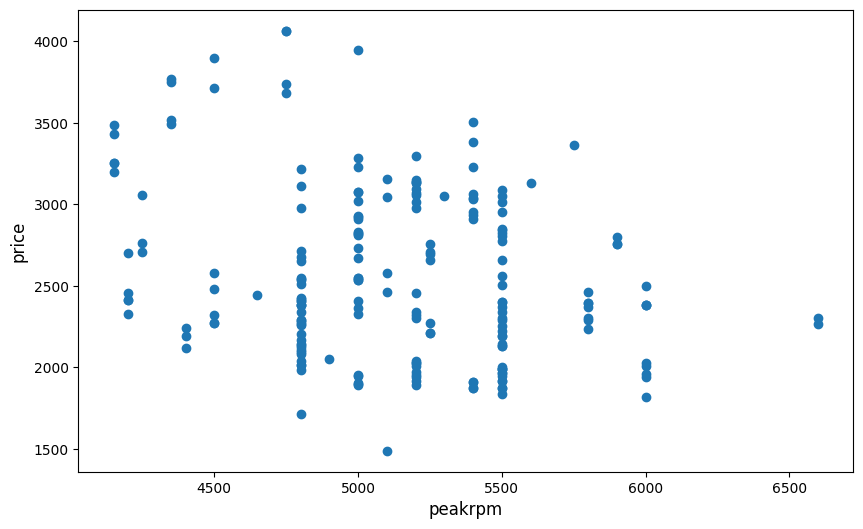

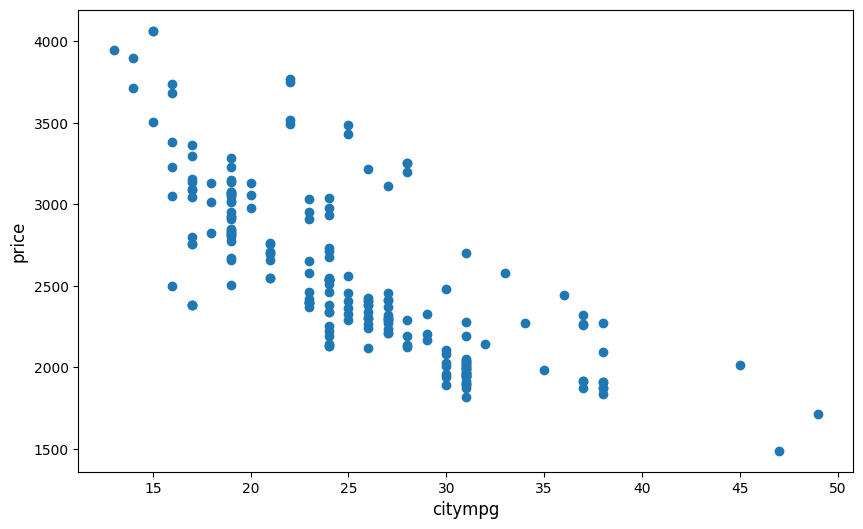

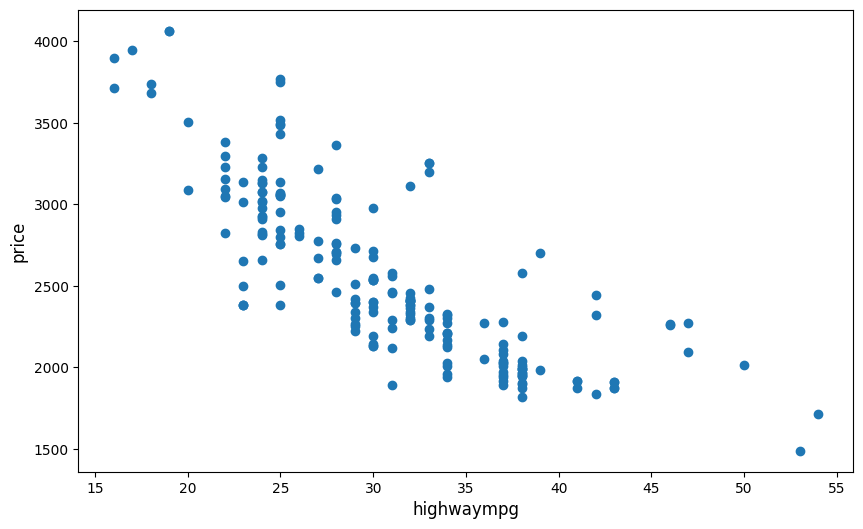

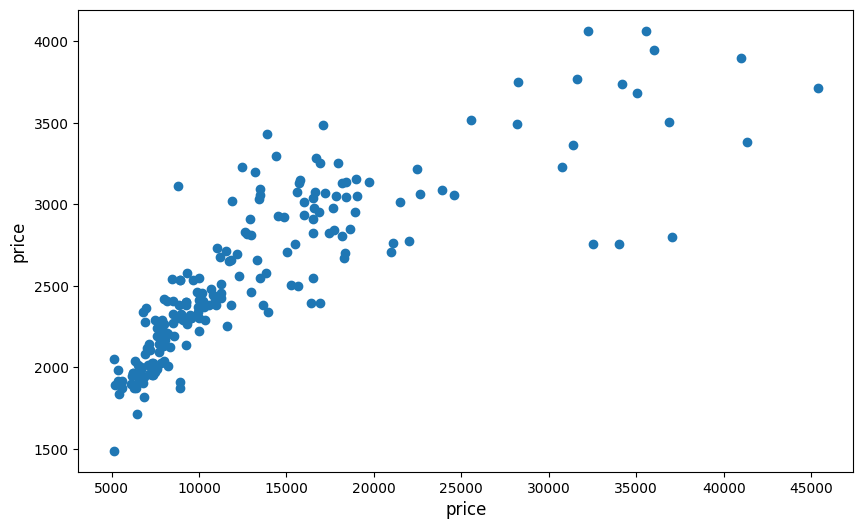

In [ ]:
for index in dataset.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(dataset[index], dataset['curbweight'])
    plt.ylabel('price', size=12)
    plt.xlabel(index, size=12)
    plt.show()

In [ ]:
# подготавливаем датасет к обучению

X = dataset.drop(['price'], axis=1)
y = dataset['price']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (205, 23) | y shape: (205,) 


In [ ]:
# делим датасет на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15)

In [ ]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  2666.0495
  R2: 0.898
 Adjusted R2: 0.7601
 Cross Validated R2: 0.766


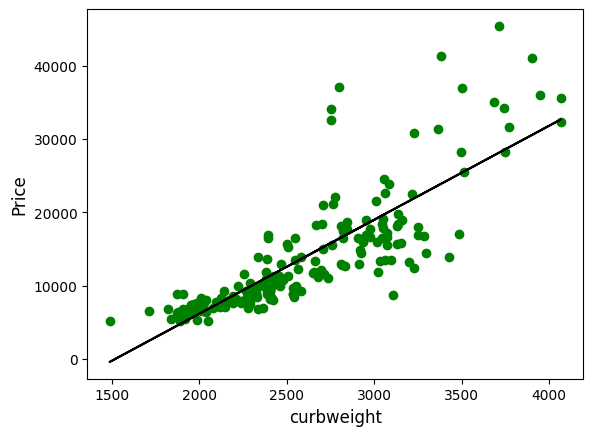

In [ ]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dataset['curbweight'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['price'].values


model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price', size=12)
plt.xlabel('curbweight', size=12)
plt.show()

# Регрессия дерева принятия решений


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a stepwise regression model
modelDT = DecisionTreeRegressor()

# Fit the model to the data
modelDT.fit(X_train, y_train)

# Predict the response for a new data point
y_dt_pred = modelDT.predict(X_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  2108.1065
  R2: 0.9363
 Adjusted R2: 0.85
 Cross Validated R2: 0.8542


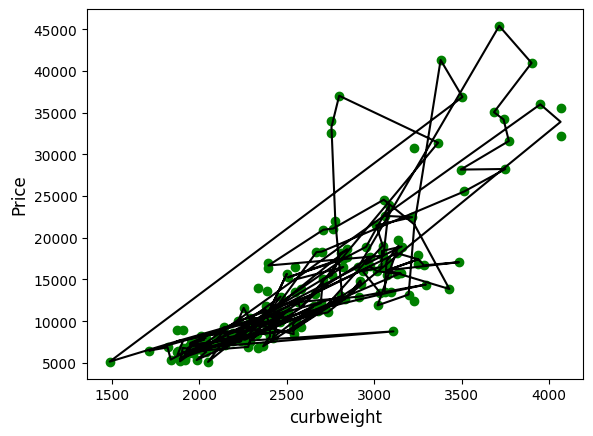

In [ ]:
X2 = dataset['curbweight'].values[:,np.newaxis]
y2 = dataset['price'].values


model2 = DecisionTreeRegressor()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price', size=12)
plt.xlabel('curbweight', size=12)
plt.show()

In [ ]:
# Регрессия случайного леса


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a stepwise regression model
modelRF = RandomForestRegressor(n_estimators=100)

# Fit the model to the data
modelRF.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelRF.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  1961.2338
  R2: 0.9448
 Adjusted R2: 0.8702
 Cross Validated R2: 0.8969


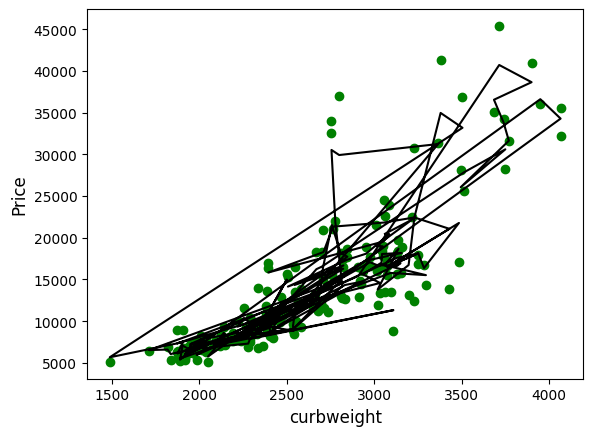

In [ ]:
X2 = dataset['curbweight'].values[:,np.newaxis]
y2 = dataset['price'].values


model2 = RandomForestRegressor(n_estimators=500)
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('Price', size=12)
plt.xlabel('curbweight', size=12)
plt.show()

# Регрессия опорных векторов (SVR)

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model
modelSVR = SVR(kernel='linear')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  3395.8964
  R2: 0.8346
 Adjusted R2: 0.6108
 Cross Validated R2: 0.7444


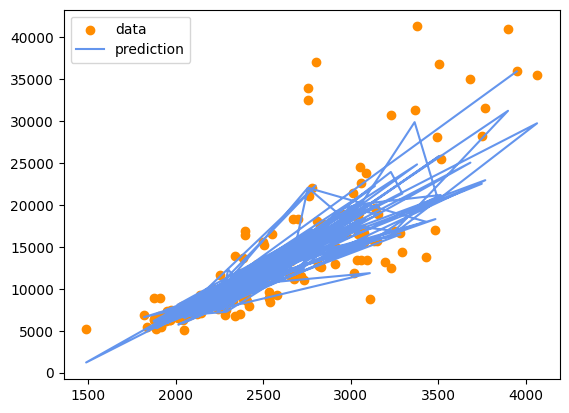

In [ ]:
plt.scatter(X_train["curbweight"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["curbweight"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR

# Create a support vector regression model. Полиномиальное ядро
modelSVR = SVR(kernel='poly')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  8889.9475
  R2: -0.1336
 Adjusted R2: -1.6673
 Cross Validated R2: -0.1776


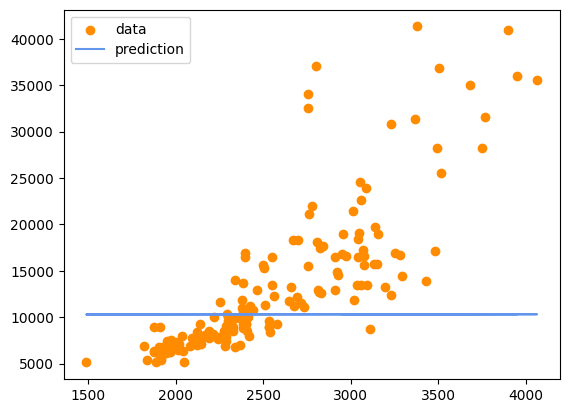

In [ ]:
plt.scatter(X_train["curbweight"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["curbweight"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [ ]:
# Create a support vector regression model. Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')

modelSVR.fit(X_train, y_train)

# Predict the response for a new data point
y_rf_pred = modelSVR.predict(X_test)


_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  8892.5534
  R2: -0.1343
 Adjusted R2: -1.6688
 Cross Validated R2: -0.1784


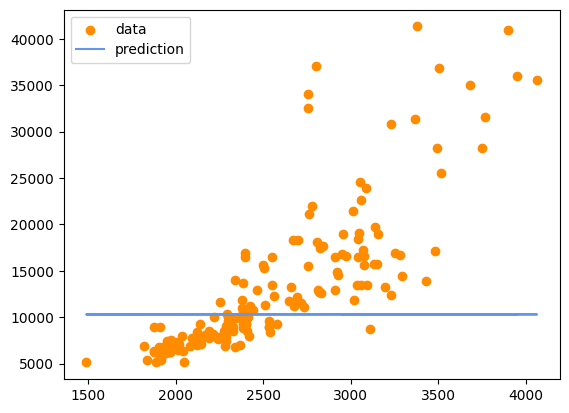

In [ ]:
plt.scatter(X_train["curbweight"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["curbweight"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

# Регрессия ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet

# Create an elastic net regression model
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the model to the data
modelEN.fit(X_train, y_train)

# Predict the response for a new data point
y_en_pred = modelEN.predict(X_test)

_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  2547.44
  R2: 0.9069
 Adjusted R2: 0.781
 Cross Validated R2: 0.7635


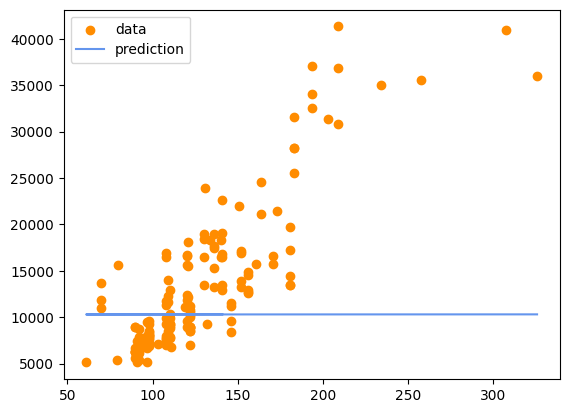

In [ ]:
plt.scatter(X_train["enginesize"], y_train, color='darkorange',
            label='data')
plt.plot(X_train["enginesize"], modelSVR.predict(X_train), color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()